 - Use the dataset UsArrests.csv included in this folder to generate a similar
in-depth PCA report of the data. Explore as much as you can, motivate the
pre-processing steps you take, and interpret the outcomes of any analyses.
 - You are also required to do an application of two clustering techniques and
an analysis of the clusters they generate. Try and see if you can find anything
common within each cluster that has been found.

In [76]:
# Importing the necessary libraries for this project
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the "USArrests" dataset from the .csv file
df = pd.read_csv("UsArrests.csv")
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


#### Preproccesing steps

In [3]:
# Check general information about the dataset : (data types, number of columns and rows)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


- The dataset has 50 rows, each representing one of the 50 states in the United States
- The dataset has 5 rows representing 
    - City: Which actually represents the name of each state
    - Murder: Murder arrests (per 100,000)
    - Assault: Assault arrests (per 100,000)
    - UrbanPop: Percent of urban population
    - Rape: Rape arrests (per 100,000)

In [4]:
# Since the  city column represents the states 
# The name of the City column is renamed to State, and we change to use it as the index column
df.rename(columns={'City':'State'},inplace=True)
df.set_index(df.State,inplace=True)
df.drop('State',axis=1,inplace=True)
df.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [5]:
# Check for missing data
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

There is no missing data from the dataset.

In [6]:
# Show some of the statistical properties of the columns
df.describe().loc[["mean","std","min","max"]]

,Murder,Assault,UrbanPop,Rape
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
max,17.40000,337.000000,91.000000,46.000000


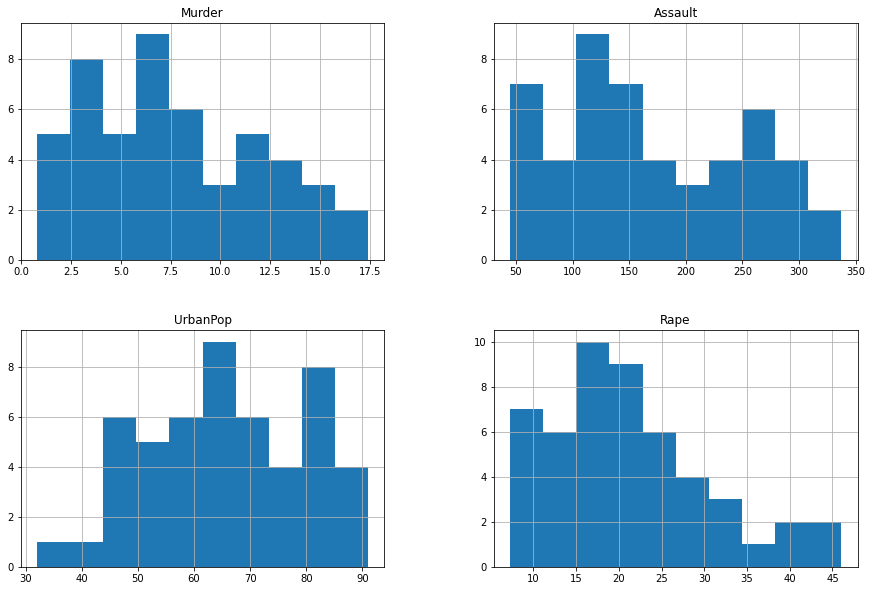

In [7]:
# Plot histograms to see the distribution of the data
df.hist(figsize=(15, 10))
plt.show()

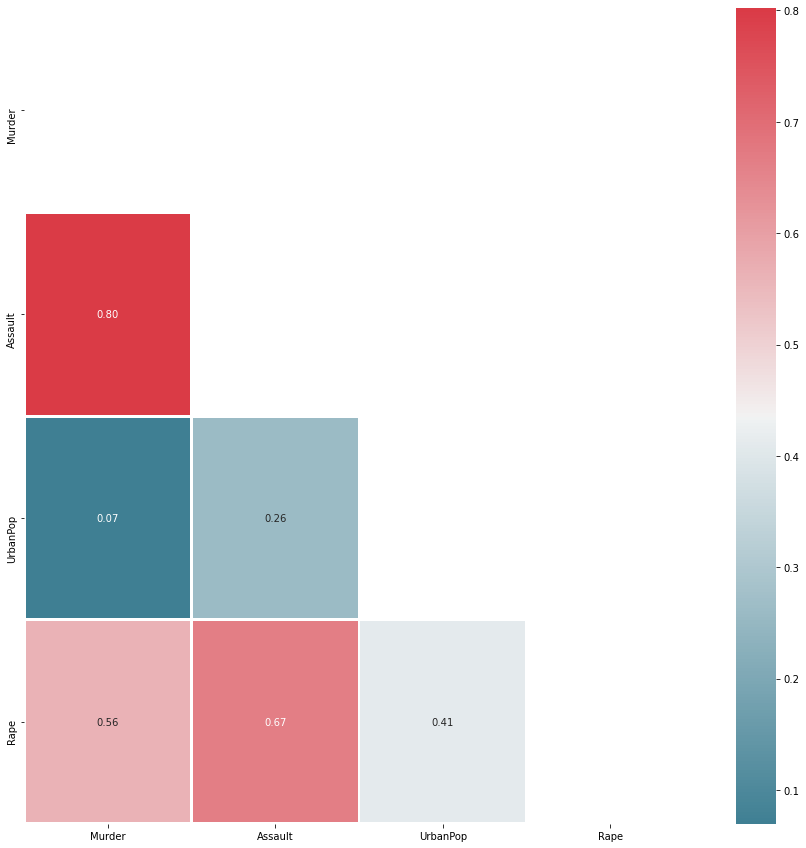

In [8]:
# Show the correlations between data
# get correlations

corrs = df.corr()

# Plot figsize
colormap = sns.diverging_palette(220, 10, as_cmap=True)
fig, ax = plt.subplots(figsize=(15, 15))

# to mask mirrored side of heatmap
dropSelf = np.zeros_like(corrs)
dropSelf[np.triu_indices_from(dropSelf)] = True

# Generate Heat Map, with annotations of the correlation strength and 2-decimal floats
ax = sns.heatmap(corrs, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=2)

plt.show()

From the above plot, we can get an insight into our data by analysing the correlations between variables:
The colour scheme allows the analysis to be easy to understand by displaying the strongly correlated variables with a darker colour, and showing little correlation between the variables with paler tones.

The plot shows that there is a strong positive correlation between the murder rate and the assault rate, this makes sense since assault can lead to murder in several cases, one of the most serious cases of assault being 1st Degree Aggravated Assault.
Murder also has a negative correlation with urban population percentage, a negative correlation shows that an increase in one category will cause a decrease in the other. 
The plots show us that Assault rates have a strong correlation with Rape rates.

Those strong positive and negative correlations in our data make the dataset a good candidate for Principal Component Analysis (PCA). Through PCA a reduced number of variables can be determined, which encode similar types of differences between countries in a way that requires fewer dimensions.

In [9]:
X = df.values

# Use PCA on the data
pca = PCA()

principal_components= pca.fit_transform(X)

# Create a dataframe with the pca data
df_pca = pd.DataFrame(principal_components,index=df.index)
df_pca.head()

,0,1,2,3
State,,,,
Alabama,64.802164,11.448007,-2.494933,2.407901
Alaska,92.827450,17.982943,20.126575,-4.094047
Arizona,124.068216,-8.830403,-1.687448,-4.353685
Arkansas,18.340035,16.703911,0.210189,-0.520994
California,107.422953,-22.520070,6.745873,-2.811826


With the pca created we can check  the standard deviation,  and variance proportion and variance ratio of each principal component

In [10]:
pd.DataFrame([df_pca.describe().transpose()["std"].values,pca.explained_variance_,pca.explained_variance_ratio_],
             index=["Standard Deviation","Cumulative Proportion","Proportion of Variance Explained"])

,0,1,2,3
Standard Deviation,83.732400,14.212402,6.489426,2.482790
Cumulative Proportion,7011.114851,201.992366,42.112651,6.164246
Proportion of Variance Explained,0.965534,0.027817,0.005800,0.000849


In [11]:
# Dataframe to see the importance of each feature

pc1 = abs( pca.components_[0])
pc2 = abs( pca.components_[1])
pc3 = abs( pca.components_[2])
pc4 = abs( pca.components_[3])

feature_importance = {"PC1_Importance":pc1,
                      "PC2_Importance":pc2,
                      "PC3_Importance":pc3,
                      "PC4_Importance":pc4
                     }
feat_df = pd.DataFrame(feature_importance,index=df.columns)#,index=df.index)
feat_df

,PC1_Importance,PC2_Importance,PC3_Importance,PC4_Importance
Murder,0.041704,0.044822,0.079891,0.994922
Assault,0.995221,0.058760,0.067570,0.038938
UrbanPop,0.046336,0.976857,0.200546,0.058169
Rape,0.075156,0.200718,0.974081,0.072325


In [12]:
def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    fig, ax = plt.subplots(figsize = (15,15))    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = df.index[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.3)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

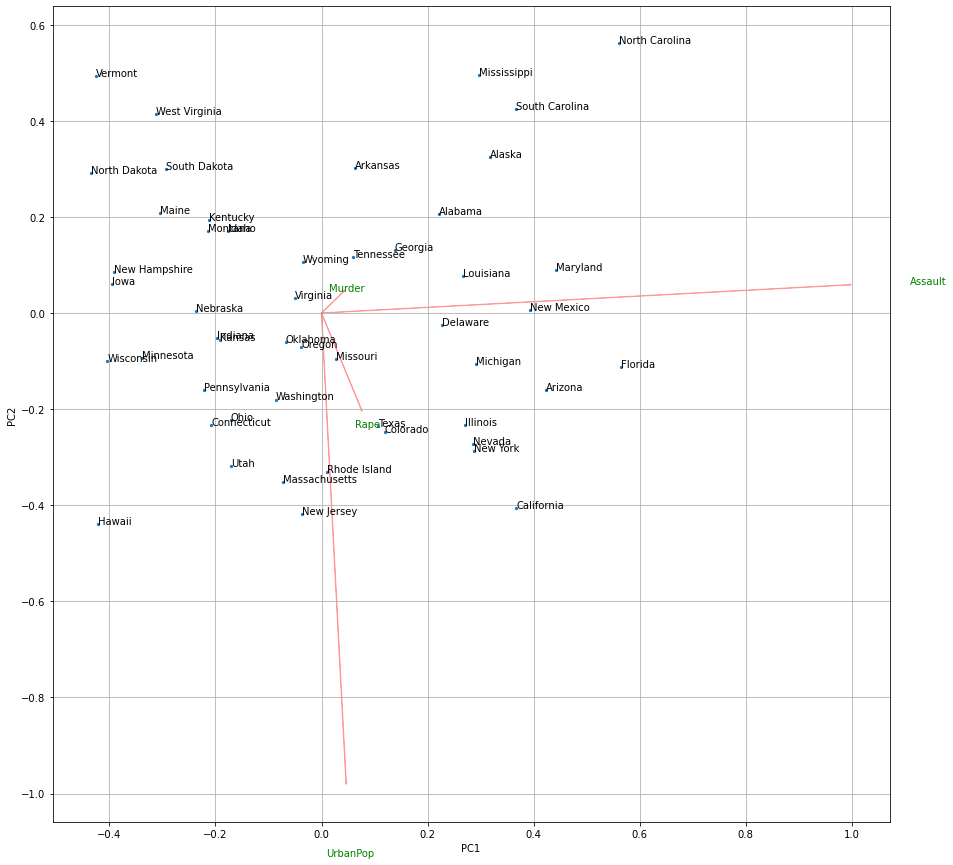

In [13]:
biplot(principal_components[:,0:2],np.transpose(pca.components_[0:2, :]),list(df.corr().columns),list(df.index))
plt.show()

In the above plot, each point represents an observation from the original data.
The axes represent the principal components, in this case, the x-axis is for the first principal component and the y-axis for the second principal component.

The length of the red line represents the importance of each feature, and just like the preview data frame showed, Assult has a greater importance in PC1, and Urban Pop has a greater importance in PC2.

##### Standardised data

In [14]:
X_std = StandardScaler().fit_transform(X)

std_pca = PCA()
X_std_trans = std_pca.fit_transform(X_std)

df_std_pca = pd.DataFrame(X_std_trans,index=df.index)
df_std_pca.head()

,0,1,2,3
State,,,,
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


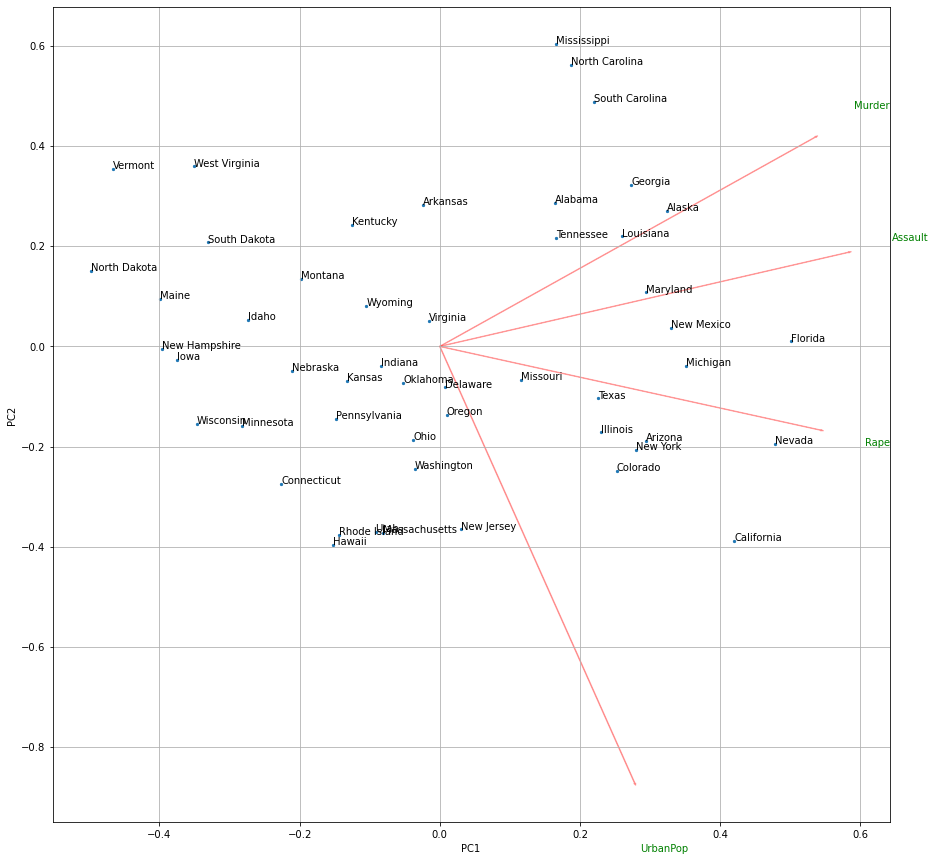

In [15]:
biplot(X_std_trans[:,0:2],np.transpose(std_pca.components_[0:2, :]),list(df.columns))
plt.show()

- We see that the standardised data results in far more variables being utilised to explain the variance, as the large numbers no longer dominate it.
- We see that most of the variables contribute fairly evenly, and also the different features cluster together in groups.

##### Scree plot

Creating a plot between the number of principal components and the variance ratio is called a scree plot
It helps us determine how many components explain most of the data (90%) to apply dimension reduction.

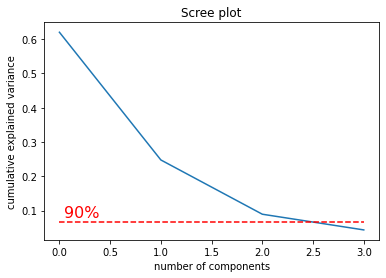

In [94]:
# Calculate the 90% value from the variance values
target = (min(std_pca.explained_variance_ratio_) + max(std_pca.explained_variance_ratio_))*0.1
# Craete an array of 4 elements with the  90% value
target = np.full(4,target)

# Plot the scree plot and the 90% line
plt.plot(std_pca.explained_variance_ratio_)
plt.plot(target,'--r')
plt.annotate('90%', xy = (0.05, 0.05),fontsize = 16, xytext = (0.05, 0.08),color = 'r')

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")
plt.show()

The scree plot indicates that the first 3 principal components together explain around 90% of the variance.
 - We can then use those 3 components to determine clusters.
 
We can also plot a heatmap to see the correlation between the features and the components, in order to determine redundant variables.

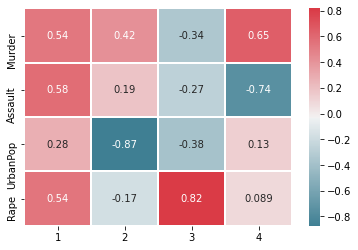

In [17]:
# Plot heat map
comp = pd.DataFrame(std_pca.components_, columns=df.columns,index=range(1,5)).transpose()
final_plot = sns.heatmap(comp,cmap=colormap,annot=True,linewidth=1)
plt.show()

In [18]:
# Select the first 3 principal components
pca_df = pd.DataFrame(X_std_trans[:,0:3], index = df.index)
pca_df.head()

,0,1,2
State,,,
Alabama,0.985566,1.133392,-0.444269
Alaska,1.950138,1.073213,2.040003
Arizona,1.763164,-0.745957,0.054781
Arkansas,-0.141420,1.119797,0.114574
California,2.523980,-1.542934,0.598557


## Hierarchical clustering

Using the dendrogram method we can see the euclidean distance between formed clusters and we can choose the k value with will represent the number of clusters formed from our data.

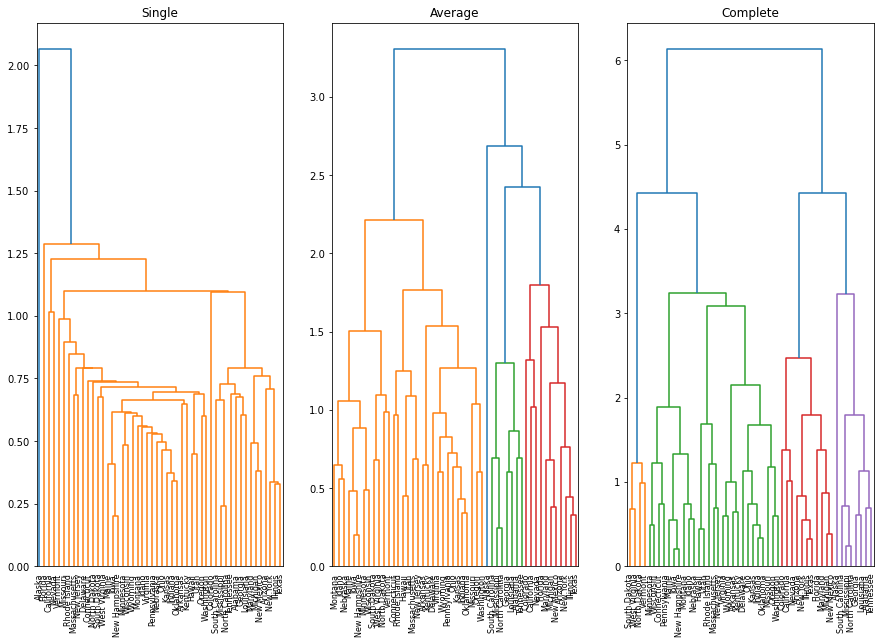

In [25]:
# Create an Agglomerative Clustering model and fir it with our data
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(pca_df)

# Craete dendrograms with different linkage types.
linkages = ['single','average','complete']
fig, ax = plt.subplots(1, 3,figsize=(15,10))

# Plot the dendrograms for each linkage type
for idx,link in enumerate(linkages):
    ax[idx].set_title(link.capitalize())
    dendrogram(linkage(pca_df, method=link), labels=pca_df.index, ax=ax[idx]) 

Depending on the linkage selected for each dendrogram we get different outcomes.
By looking at the dendrogram with the most balanced dispersion of clusters, in our case the dendrogram with the complete linkage, we can see that 4 clusters are formed.

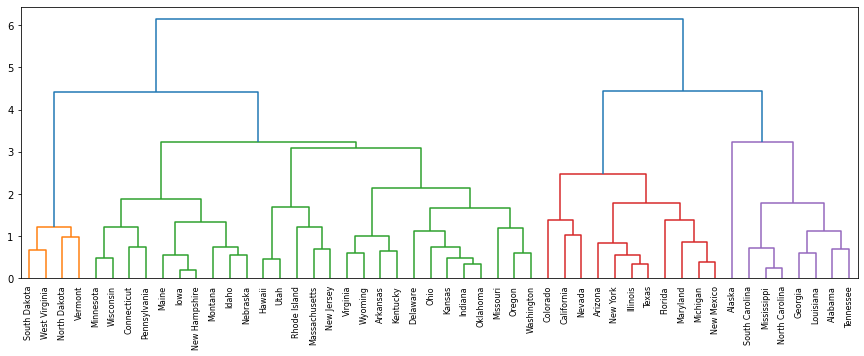

In [28]:
fig, ax = plt.subplots(figsize=(15,5))
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index)
plt.show()

## KMeans clustering

   Another way that we can cluster our data is by using the K-means clustering partitioning algorithm.
    
   This method requires the number of clusters that we want to form, but due to the previews method with the Hierarchical clustering, we know that the number of clusters that can form is 4.
    
  Because the Kmeans clustering is a flat clustering method, we will plot two examples of clustering with this method using pairs of principal components (first with second & first with last principal components).

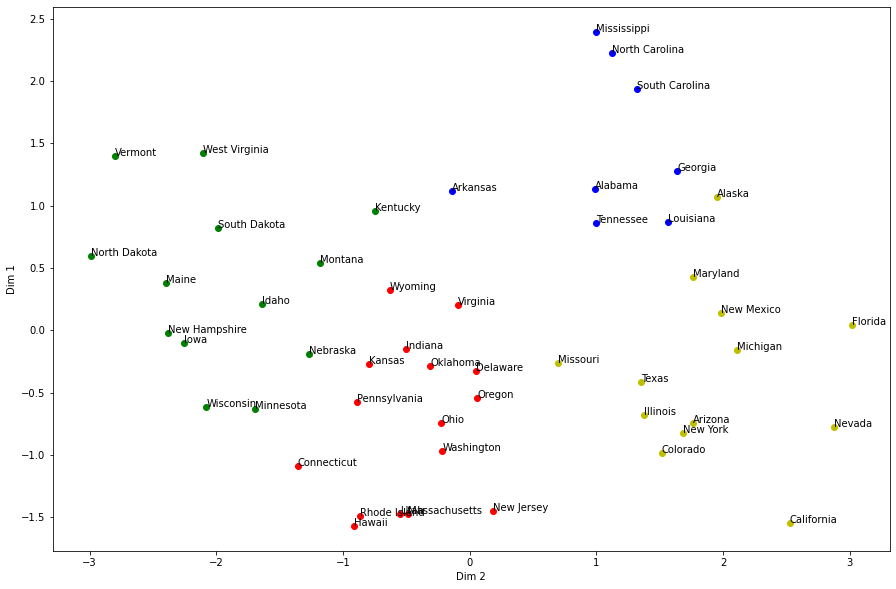

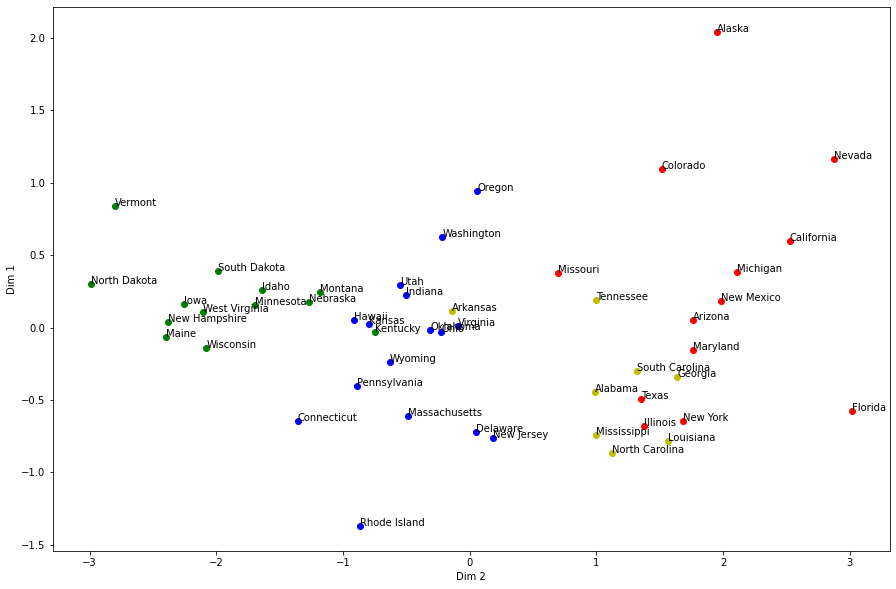

In [95]:
# Define a function the creates the kmeans model and plots the results
def kmeans_clustering(pc1,pc2):
    # The number of clusters (k) should be 4 as the dendrogram showed.
    k=4
    
    # Fit the model
    kmeans = KMeans(n_clusters=k, init='k-means++',n_init=10)
    cluster_labels = kmeans.fit_predict(pca_df)
    cent = kmeans.cluster_centers_
    
    # Plot clusters
    fig, ax = plt.subplots(figsize=(15,10))
    colours = 'rbgy'
    for i in range(0,k):
        ax.scatter(pc1[cluster_labels == i],pc2[cluster_labels == i],c = colours[i]) 

    for i in range(0,len(x)):
            txt = df.index[i]
            ax.annotate(txt, (pc1[i], pc2[i]))
    ax.set_xlabel("Dim 2")
    ax.set_ylabel("Dim 1")

    
# K means clustering for first with second principal components
# Extract the principal components 1 and 2
x = X_std_trans[:,0]
y = X_std_trans[:,1]

# Use the defined function to  cluter the data and plot the clusters
kmeans_clustering(x,y)

# Extract the principal components 1 and 3
x = X_std_trans[:,0]
y = X_std_trans[:,2]

# Use the defined function to cluster the data and plot the clusters
kmeans_clustering(x,y)

In the first plot, where the 4 clusters are formed based on the first two principal components, we see clustering based on the overall rates of all states. The clusters are well defined, due to the fact that the first 2 principal components, as the scree plot shows, explain around 60 to 70% of the data.
Based on this plot we can say we have 4 classes:
   - Low rates of criminality - green
   - Medium rates of criminality- red
   - High rates of criminality towards Murder - blue
   - High rates of criminality towards Rape- yellow

In comparison, the plot that clusters the data based on the first and last principal component has poorer clustered points (some clusters intersect with others).